<a href="https://colab.research.google.com/github/Chamngo-create/Homework/blob/main/Homework_AI_(10_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mnist, check the accuracy with images of written digits (10 images)
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential([
        Dense(256, activation='relu', input_shape=(784,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=64, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")
model.save("/content/mnist_model.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8568 - loss: 0.4755 - val_accuracy: 0.9597 - val_loss: 0.1250
Epoch 2/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9699 - loss: 0.1003 - val_accuracy: 0.9728 - val_loss: 0.0825
Epoch 3/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9800 - loss: 0.0641 - val_accuracy: 0.9730 - val_loss: 0.0875
Epoch 4/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9848 - loss: 0.0469 - val_accuracy: 0.9740 - val_loss: 0.0799
Epoch 5/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9878 - loss: 0.0387 - val_accuracy: 0.9773 - val_loss: 0.0784
Epoch 6/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9761 - val_loss: 0.0855
Epoch 7/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9817 - val_loss: 0.0684
Epoch 8/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9926 - loss: 0.0239 - val

Accuracy: 98.52%



Ảnh: 0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Số tiên đoán: 0


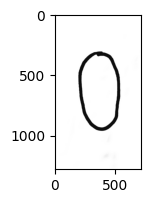


Ảnh: 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Số tiên đoán: 1


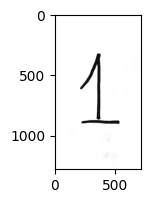


Ảnh: 2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Số tiên đoán: 2


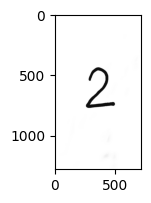


Ảnh: 3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Số tiên đoán: 3


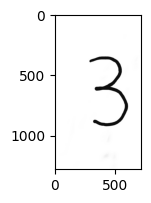


Ảnh: 4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Số tiên đoán: 4


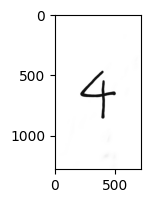


Ảnh: 5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Số tiên đoán: 5


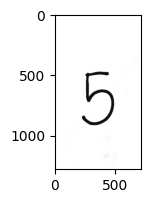


Ảnh: 6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Số tiên đoán: 6


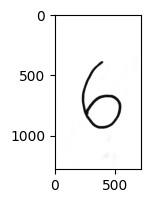


Ảnh: 7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Số tiên đoán: 7


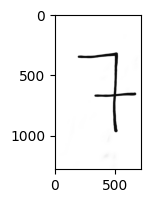


Ảnh: 8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Số tiên đoán: 8


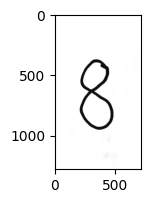


Ảnh: 9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Số tiên đoán: 9


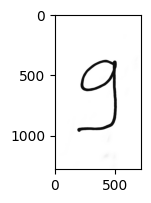

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
model = load_model("/content/mnist_model (1).h5")
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    if np.mean(img) > 128:
        img = cv2.bitwise_not(img)
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 28 * 28)
    return img
def predict_digit(image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)[0]
    predicted_digit = np.argmax(prediction)
    return predicted_digit
image_paths = ["0.jpg", "1.jpg", "2.jpg", "3.jpg", "4.jpg", "5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg"]

for path in image_paths:
    print(f"\nẢnh: {path}")
    predicted_digit = predict_digit(path)
    print(f"Số tiên đoán: {predicted_digit}")

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap="gray")
    plt.show()


In [ ]:
# fashion mnist, applying to cloth images (10 images)
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test)
print(f" Accuracy trên tập kiểm tra: {acc*100:.2f}%")
model.save("/content/fashion_mnist_model.h5")



Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7279 - loss: 0.7616 - val_accuracy: 0.8404 - val_loss: 0.4575
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8563 - loss: 0.3950 - val_accuracy: 0.8601 - val_loss: 0.3822
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8755 - loss: 0.3395 - val_accuracy: 0.8500 - val_loss: 0.4125
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8827 - loss: 0.3173 - val_accuracy: 0.8713 - val_loss: 0.3539
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8880 - loss: 0.3006 - val_accuracy: 0.8820 - val_loss: 0.3340
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8959 - loss: 0.2809 - val_accuracy: 0.8788 - val_loss: 0.3420
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9022 - loss: 0.2627 - val_accuracy: 0.8704 - val_loss: 0.3601
Epoch 8/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9015 - loss: 0.2602 - val_a

 Accuracy trên tập kiểm tra: 89.56%



Ảnh: img1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Loại quần áo tiên đoán: T-shirt


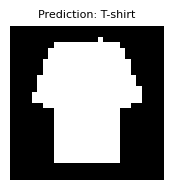


Ảnh: img2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Loại quần áo tiên đoán: Trouser


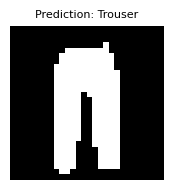


Ảnh: img3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Loại quần áo tiên đoán: Coat


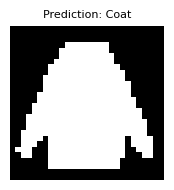


Ảnh: img4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Loại quần áo tiên đoán: Dress


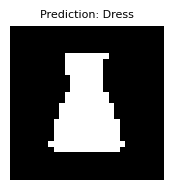


Ảnh: img5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Loại quần áo tiên đoán: Pullover


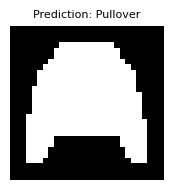


Ảnh: img6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Loại quần áo tiên đoán: Sneaker


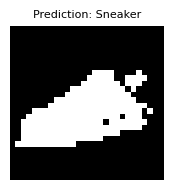


Ảnh: img7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Loại quần áo tiên đoán: Shirt


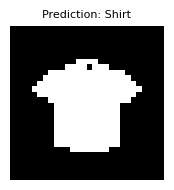


Ảnh: img8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Loại quần áo tiên đoán: Sandal


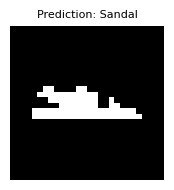


Ảnh: img9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Loại quần áo tiên đoán: Bag


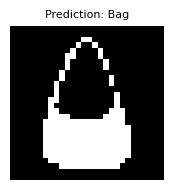


Ảnh: img10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Loại quần áo tiên đoán: Ankle boot


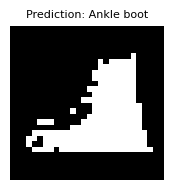

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
model = load_model("/content/fashion_mnist_model (1).h5")
fashion_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    if np.mean(img) > 128:
        img = cv2.bitwise_not(img)
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    img = img.astype("float32") / 255.0
    return img

def predict_clothing(image_path):
    processed_img = preprocess_image(image_path)
    img_for_prediction = processed_img.reshape(1, 28 * 28)
    prediction = model.predict(img_for_prediction)[0]
    predicted_label = np.argmax(prediction)
    return predicted_label, processed_img

image_paths = ["img1.jpg", "img2.jpg", "img3.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img8.jpg", "img9.jpg", "img10.jpg"]

for path in image_paths:
    print(f"\nẢnh: {path}")
    predicted_label, processed_img = predict_clothing(path)
    print(f"Loại quần áo tiên đoán: {fashion_labels[predicted_label]}")
    plt.figure(figsize=(2, 2))
    plt.imshow(processed_img, cmap="gray")
    plt.title(f"Prediction: {fashion_labels[predicted_label]}", fontsize=8)
    plt.axis("off")
    plt.show()


In [ ]:
# cifar10, check the images of dogs, cats, boats, deer...
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")
model.save("/content/cifar10_model.h5")


Epoch 1/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.2611 - loss: 2.0073 - val_accuracy: 0.3629 - val_loss: 1.7663
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.3841 - loss: 1.7236 - val_accuracy: 0.4205 - val_loss: 1.6290
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4152 - loss: 1.6287 - val_accuracy: 0.3748 - val_loss: 1.7478
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4423 - loss: 1.5516 - val_accuracy: 0.4668 - val_loss: 1.4903
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4637 - loss: 1.4967 - val_accuracy: 0.4503 - val_loss: 1.5282
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4722 - loss: 1.4720 - val_accuracy: 0.4792 - val_loss: 1.4611
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.4873 - loss: 1.4368 - val_accuracy: 0.4671 - val_loss: 1.4867
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4900 - loss: 1

Accuracy: 46.68%



Image: i1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Class: Frog


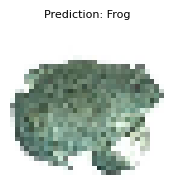


Image: i2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: Truck


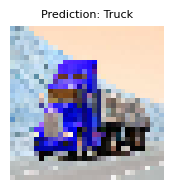


Image: i3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: Deer


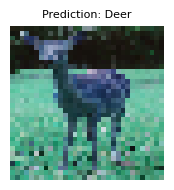


Image: i4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Automobile


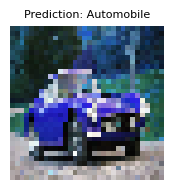


Image: i5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Bird


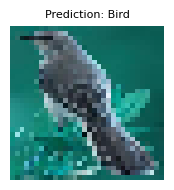


Image: i6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Class: Horse


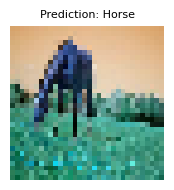


Image: i7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Class: Ship


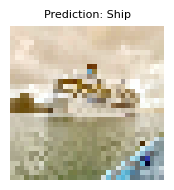


Image: i8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Class: Airplane


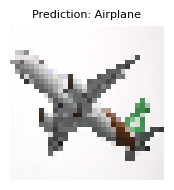


Image: i9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Class: Cat


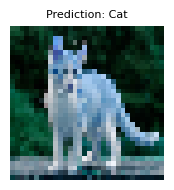


Image: i10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: Dog


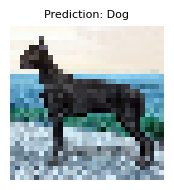

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
model = load_model("/content/cifar10_model.h5")
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))
    img = img.astype("float32") / 255.0
    return img
def predict_cifar10(image_path):
    processed_img = preprocess_image(image_path)
    img_for_prediction = processed_img.reshape(1, 32 * 32 * 3)
    prediction = model.predict(img_for_prediction)[0]
    predicted_label = np.argmax(prediction)
    return predicted_label, processed_img
image_paths = ["i1.jpg", "i2.jpg", "i3.jpg", "i4.jpg", "i5.jpg", "i6.jpg", "i7.jpg", "i8.jpg", "i9.jpg", "i10.jpg"]
for path in image_paths:
    print(f"\nImage: {path}")
    predicted_label, processed_img = predict_cifar10(path)
    print(f"Predicted Class: {cifar10_labels[predicted_label]}")
    plt.figure(figsize=(2, 2))
    plt.imshow(processed_img)
    plt.title(f"Prediction: {cifar10_labels[predicted_label]}", fontsize=8)
    plt.axis("off")
    plt.show()



In [ ]:
# cifar100, same to previous requirements
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.optimizers import SGD
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(100, activation='softmax')
])
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test)
print(f"Final Accuracy: {acc*100:.2f}%")
model.save("/content/cifar100_model.h5")

Epoch 1/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.0336 - loss: 4.6236 - val_accuracy: 0.0955 - val_loss: 3.9664
Epoch 2/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.0819 - loss: 4.0183 - val_accuracy: 0.1295 - val_loss: 3.7571
Epoch 3/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.1009 - loss: 3.8742 - val_accuracy: 0.1407 - val_loss: 3.7076
Epoch 4/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.1144 - loss: 3.7918 - val_accuracy: 0.1489 - val_loss: 3.6264
Epoch 5/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.1249 - loss: 3.7368 - val_accuracy: 0.1552 - val_loss: 3.5946
Epoch 6/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.1285 - loss: 3.7009 - val_accuracy: 0.1682 - val_loss: 3.5560
Epoch 7/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.1354 - loss: 3.6632 - val_accuracy: 0.1637 - val_loss: 3.5472
Epoch 8/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.1387 - loss: 3

Final Accuracy: 24.49%



 Image: i1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
 Predicted Class: telephone


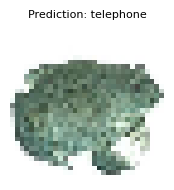


 Image: i2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 Predicted Class: lawn_mower


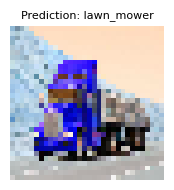


 Image: i3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
 Predicted Class: dolphin


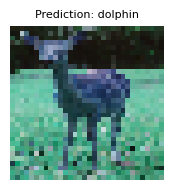


 Image: i4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
 Predicted Class: pickup_truck


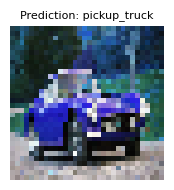


 Image: i5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 Predicted Class: dolphin


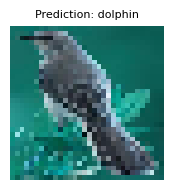


 Image: i6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
 Predicted Class: dolphin


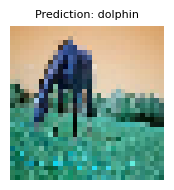


 Image: i7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 Predicted Class: wardrobe


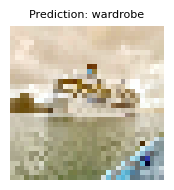


 Image: i8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
 Predicted Class: cockroach


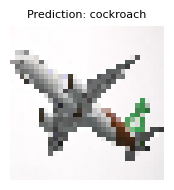


 Image: i9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 Predicted Class: shark


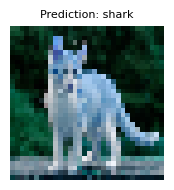


 Image: i10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 Predicted Class: whale


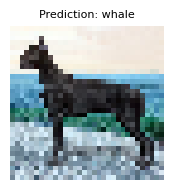

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
model = load_model("/content/cifar100_model.h5")

from keras.datasets import cifar100
(_, _), (_, y_test_labels) = cifar100.load_data(label_mode="fine")
cifar100_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))
    img = img.astype("float32") / 255.0
    return img

def predict_cifar100(image_path):

    processed_img = preprocess_image(image_path)
    img_for_prediction = processed_img.reshape(1, 32 * 32 * 3)
    prediction = model.predict(img_for_prediction)[0]
    predicted_label = np.argmax(prediction)
    return predicted_label, processed_img

image_paths = ["i1.jpg", "i2.jpg", "i3.jpg", "i4.jpg", "i5.jpg",
               "i6.jpg", "i7.jpg", "i8.jpg", "i9.jpg", "i10.jpg"]
for path in image_paths:
    print(f"\n Image: {path}")
    predicted_label, processed_img = predict_cifar100(path)
    print(f" Predicted Class: {cifar100_labels[predicted_label]}")
    plt.figure(figsize=(2, 2))
    plt.imshow(processed_img)
    plt.title(f"Prediction: {cifar100_labels[predicted_label]}", fontsize=8)
    plt.axis("off")
    plt.show()